In [17]:
import osmnx as ox
import matplotlib.pyplot as plt

countries = ox.gdf_from_places(['Thailand', 'Laos', 'Myanmar', 'Cambodia'])
countries['name_length'] = list(map(lambda x: len(x), countries['place_name']))

(91.398789469999997, 108.40815173, 4.4661018000000006, 29.694584200000001)

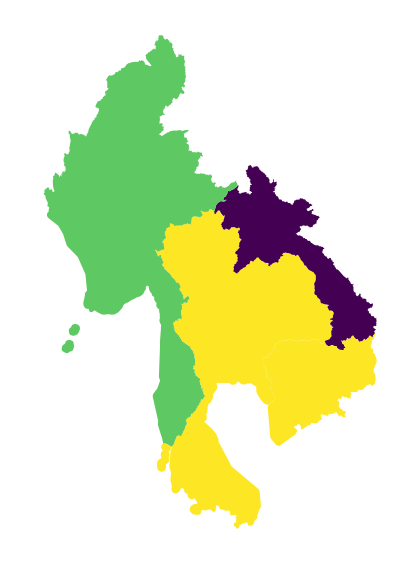

In [18]:
countries.plot(column='name_length', figsize=(10, 10))
plt.axis('off')

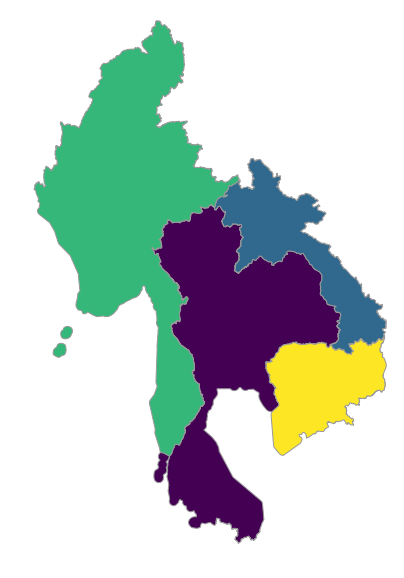

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x106c68358>)

In [21]:
ox.plot_shape(countries, fc=ox.get_colors(n=4), figsize=(10, 10))

In [70]:
import pandas as pd

provinces = pd.read_csv('data/provinces.csv')

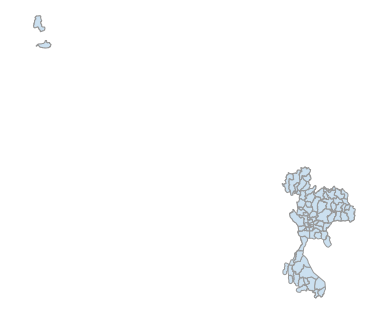

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b593dd8>)

In [72]:
provinces_shapes = ox.gdf_from_places(list(map(lambda x: {'state': x}, provinces['name_en'])))
ox.plot_shape(provinces_shapes)

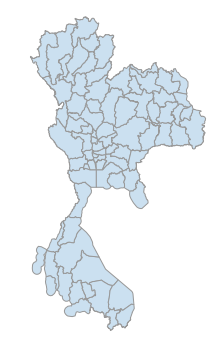

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1195e3c18>)

In [71]:
import geopandas as gpd

provinces_shapes2 = []
for name in list(map(lambda x: {'state': x}, provinces['name_en'])):
    for i in range(1, 10):
        shape = ox.gdf_from_place(name, which_result=i)
        if not shape.empty and (shape.place_name.str.find('Thailand') >= 0).any():
            provinces_shapes2.append(shape)
            break
        
provinces_shapes2 = gpd.GeoDataFrame(pd.concat(provinces_shapes2, ignore_index=True))
ox.plot_shape(provinces_shapes2)